**Case Study: Mind Map**

Module overview:
* Visualisation examples
* Using visualisation to derive and communicate insights
* Case study: Analysing the Google Play Store Ratings Dataset
* Data manipulation & wrangling
* Visualisations using Python libraries - matplotlib & seaborn
* Use Plotly library to make beautiful interactive charts

Scenario:

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. For which, you can ask questions like:

* Does a higher size or price of an app necessarily mean that it would perform better than the other apps?
* Or does a higher number of installs give a clear picture of which app would have a better rating than others?

Question: Target Variable

In the world of machine learning, the target variable is defined as the variable or column in a dataset whose value is to be predicted or analysed by using the other variables in the same dataset. For our case study, can you guess which of the following is the target variable?

Solution: Rating

You want to analyse the data set to find out the features that determine whether an app is performing well or not in ratings. Therefore, the Rating column is our target variable. You’ll be analysing the way the rating varies across different categories of other variables to determine the most important indicators for the high-performing apps.

**Data Handling and Cleaning: I**

# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [3]:
#import the libraries
import pandas as pd, numpy as np

In [173]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [174]:
#Check the shape of the dataframe
inp0.shape # 10.8k rows, 13 cols, i.e. 10.8k apps and 13 features or cols

(10841, 13)

In [175]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


As we can see from inp0.info(), some of the cols like rating have missing values, and some have incorrect data types assicated with them. Let’s discuss both of them briefly here:

* Missing values: You would almost always encounter data which have rows where no
observation is recorded for a certain variable. These can affect the analysis process and the generated insights significantly. Some common techniques to treat this issue are
     * Imputation, where you replace the missing value with another estimated value
     * Dropping the rows containing the missing values altogether
     * or depending on the case, you can also go ahead and keep the missing values as long as they don’t affect the analysis.


* Incorrect data types: This discrepancy mostly occurs due to some incorrect entry in the column which is stored in a format other than the desired one due to which the entire column gets misclassified. Or in some other cases, the format of the entire column is different from what we need for our analysis purposes. You either have to fix certain values or clean the entire column only to bring it to the correct format.

Missing values will affect our statistics drastically, for starters our inbuild functions of mean, sum, var etc will give incorrect results which clearly is quite dangerous. Also, you need the values to be in the numeric format of int or float to perform these operations. Before you proceed to the data analysis and visualisation part, it is essential for you to remove the above discrepancies.

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [176]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [177]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records where ratings is missing, since rating is the target value, you do not want to do any guesswork for ratings.

In [178]:
#Drop the rows having null values in the Rating field
inp1 = inp0.dropna(subset=['Rating']) # this is the same as inp1 = inp0[∼inp0.Rating.isnull()]
#dropna drops rows where the 'Rating' column has null values

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [179]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [180]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [181]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can see that in record 10472, the data has shifted. E.g. in installs, it says free instead of a number, price says everyone, so the values are not in the right column. For this reason, we should drop this column.

In [182]:
#Drop the row having shifted values
inp1.loc[10472, :] # this drops row 10472, including all its cols. This is not good practice (hard coded)


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [105]:
# identify the row with shifted values, best practice, using identifiers (android ver = 0) and category = 1.9
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [183]:
# drop the row with shifted values, best practice
inp1 = inp1[~((inp1['Android Ver'].isnull()) & (inp1.Category == "1.9"))]
# this is the same as
# inp1 = inp1[∼(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [184]:
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [185]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [186]:
#Fill up the nulls in the Android Version column with the most common value
inp1['Android Ver'].mode() #

0    4.1 and up
Name: Android Ver, dtype: object

In [187]:
# extract string value from the above
inp1['Android Ver'].mode()[0] #0 extracts the string value

'4.1 and up'

In [188]:
# fill the NANs with this value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [189]:
inp1['Android Ver'].value_counts() # as we can see value at "4.1 and up" has been incremented by 2

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [191]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [192]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

Missing values in Current Ver

In [193]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [194]:
#Replace the nulls in the Current version column with "Varies with device"

inp1['Current Ver'].mode()[0]

'Varies with device'

In [195]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [196]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()
# this worked because value at varies with device has increased by 4

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

**Data Handling and Cleaning: II**

In the previous segment, you were briefly introduced to the dataset and also performed some basic data-cleaning tasks by handling the null values. The next step would be to handle the data types of the columns. It is essential that your columns are also in the correct format or else it may hamper any further analysis.

In [197]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"
inp1[inp1['Android Ver'] == '4.1 and up']['Price'].mean()

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000 to numeric

As we can see, the data type is incorrect, since it contains string values so we cant compute the mean.

#### Handling Incorrect Data Types

Change the variables to the correct types

In [198]:
#Check the datatypes of all the columns
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [199]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


From the first 5 rows, seems like price is numeric but .dtypes says something else. So lets explore this:

In [200]:
#Analyse the Price column to check the issue
inp1['Price'].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

As we can see, the issue is that there is a dollar sign in front of all values that are not 0. So we need to remove the $ sign and extract the numbers if its not 0.

In [201]:
#Write the function to make the changes
# Convert the 'Price' column to numeric
inp1.Price = inp1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))
# if x is 0, return 0, if x != 0, return only the numbers, everything after the $ sign

In [202]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [203]:
inp1.Price.value_counts() # we successfully removed the $ sign

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

Handle the reviews column

In [204]:
#Analyse the Reviews column
inp1['Reviews'].value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [205]:
# since reviews is float, but nr of reviews can only be an int, we change dtype from float to int

In [206]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32") # this will help optimize memory, since reviews wont contain large numbers we can do that

# check if this worked
inp1.Reviews.dtype

dtype('int32')

In [207]:
#Check the quantitative spread of this dataframe
inp1.Reviews.describe() # this one will change dtype to float because of the float values in mean, std etc

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Handle the installs column

In [208]:
#Analyse the Installs Column
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

As we can see, installs is object but should be numeric value like float

In [209]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

As we can see, there is a comma in between the nums and + in the end. So we need to remove the commas and + signs

**Question** Clean the Installs Column and find the approximate number of apps at the 50th percentile.

In [213]:
import re
# Remove commas and plus sign from the Installs column
inp1['Installs'] = inp1['Installs'].apply(lambda x: re.sub(r'[,+]', '', x))
# 're.sub' performs a substitution operation on the input string 'x'
# The pattern '[,+]' is a regular expression that matches any comma ',' or plus '+' characters in the string
# The 'repl' parameter is an empty string '' which means that the matched pattern will be replaced with nothing (removed)
# So, 're.sub(r'[,+]', '', x)' removes all commas and plus signs from the input string 'x'
# The 'r' prefix before the pattern string '[,+]' is used to create a raw string literal, which treats backslashes as literal characters
# This lambda function is applied to each element of the 'Installs' column in the DataFrame 'inp1' using the 'apply' method
# The resulting Series after applying the lambda function will have all commas and plus signs removed from the 'Installs' column values

# .sub stands for substitute, so we are substituting ,+ ''

TypeError: expected string or bytes-like object

In [214]:
# Convert the cleaned Installs column to numeric
inp1['Installs'] = pd.to_numeric(inp1['Installs'])

In [215]:
# Find the approximate number of apps at the 50th percentile
median_installs = inp1['Installs'].quantile(0.5)
print(f"Approximate number of apps at the 50th percentile: {median_installs}")

Approximate number of apps at the 50th percentile: 500000.0



```
re
``` explanation

The re module in Python helps you search for specific patterns in text. Think of it as a way to find and work with parts of text that fit a certain format.

In [216]:
import re

# Define a string
text = "Hello, world!"

# Search for a pattern in the string
# Here, 'H..' will match any three characters that start with 'H'
match = re.search(r'H..', text)

# Print the found match
print("Found:", match.group()) if match else print("No match found")

Found: Hel


#### **Sanity Checks**

Once you’ve completed the basic data cleaning and data handling tasks, the next step is to ensure that the data that is available with us ‘makes sense’. What it means is that the data needs to be factually correct apart from being of the correct data type.



For example, on a test where you can score between 0 and 100, it is not possible for a student to score 110 marks. Therefore, if such discrepancies occur in a data set, then you need to take care of them accordingly. So, in order to quickly check whether the data in the columns is rational and makes sense, you need to perform the so-called sanity checks.

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [217]:
# Avg rating should be between 1 & 5
inp1.Rating.describe() # this seems correct, all ratings are between 1 and 5

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [218]:
#Perform the sanity checks on the Reviews column
# reviews should be <= Installs
inp1[(inp1.Reviews > inp1.Installs)].shape
# as we can see, there are 7 rows that have higher installs than reviews which cant be right

(7, 13)

In [219]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [220]:
# since this seems like incorrect data, lets drop those rows
inp1 = inp1[inp1.Reviews <= inp1.Installs]

For free apps, price should be smaller or equal to 0

In [221]:
#perform the sanity checks on prices of free apps
inp1[(inp1.Type == "Free") & (inp1.Price > 0)] # seems like this data is correct

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


As you saw in the video, three essential sanity checks were performed on the data:

* Rating is between 1 and 5 for all the apps.
* Number of Reviews is less than or equal to the number of Installs.
* Free Apps shouldn’t have a price greater than 0.

The first and third conditions were satisfied, whereas the second condition was not satisfied with some records. When you inspected those records, you realised that those apps were likely junk apps and therefore you should ideally remove those records.

**Outliers Analysis with Boxplots**

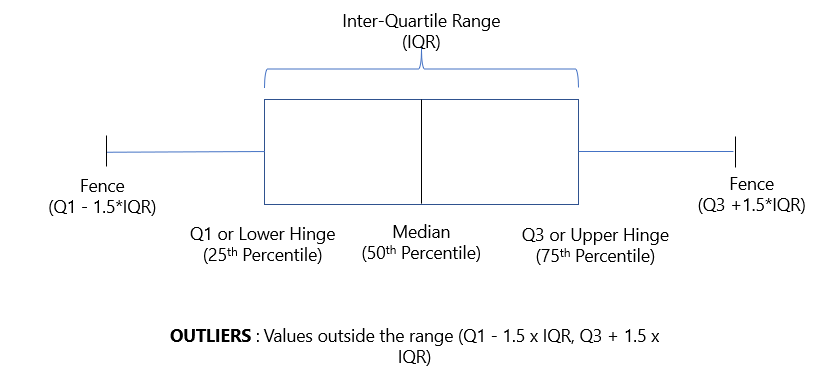

In [222]:
from IPython.display import Image
Image(filename='Boxplot.png') # outliers would be outside the fence

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

If you're having trouble visualising a box plot, you can take a look at this simple [example](https://www.youtube.com/watch?v=09Cx7xuIXig) to get an idea on how box plots are created.



As you might have learnt earlier, the ‘maximum’ and ‘minimum’ values, which are represented by the fences of the box plot, are given by the formula Q3 + 1.5 * IQR and Q1-1.5 * IQR, respectively. Any value lying outside this range would be treated as an outlier.

[Here IQR or the interquartile range denotes the values that lie between the 25th and 75th percentiles.]

In [223]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

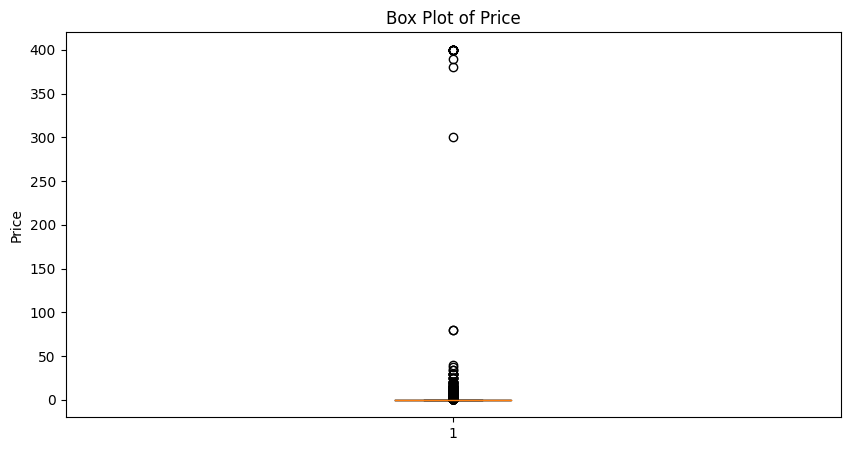

In [224]:
import matplotlib.pyplot as plt

# Assuming inp1 is your DataFrame and 'Price' is the column you want to plot

plt.figure(figsize=(10, 5))
plt.boxplot(inp1['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()


In [225]:
# For the given dataset, calculate the IQR of the Price column.
inp1['Price'].describe() # (IQR) is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1)
# so IQR = Q3 - Q1 = 0.0 - 0.0 = 0.0

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Analyze the price column

Identifying & handing outliers/extreme values

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline # When you use this command, any plot you create will be rendered and displayed below the code cell as soon as you call the plot's display function (like plt.show()).

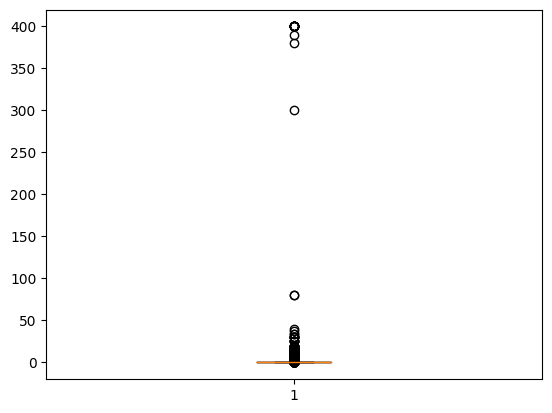

In [228]:
plt.boxplot(inp1['Price'])
plt.show()

In [229]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


As we can see these apps seem suspicious, and we cant rely on this data so lets remove it

In [230]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

In [231]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

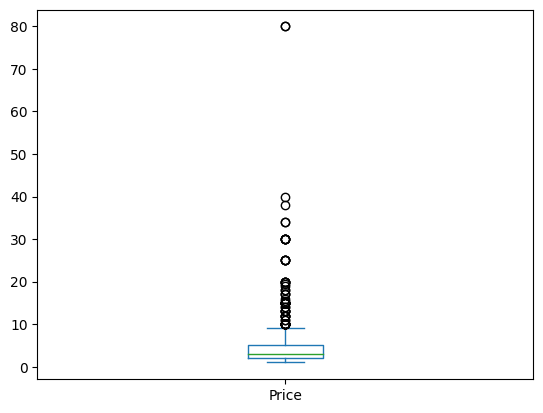

In [232]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()

In [233]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


As we can see, some of these apps are duplicates, others are still not legit (e.g. i am rich). Considering that these are either unusual or not legit, we can drop these.

In [235]:
#Clean the Price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

So, the two major takeaways from outlier analysis are as follows:

* Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
* In the former case, you should determine whether or not removing them would add value to your analysis procedure.

Additional Notes:

* Several definitions exist for outliers for different contexts so that the correct procedure is followed for removing them. You can go through [this link](https://www.anodot.com/blog/quick-guide-different-types-outliers/) for more information.
* Box plots are utilised not just for outlier analysis, but can also be used to compare a certain numeric variable across different categories. You’ll learn about this method in the next session where we start analysing the data for insights using Seaborn.

### **Histograms**

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


Key points about histograms:

* Analyses numeric variables to visualise the frequency of records
* Divides the range of numerical values to specific buckets or bins
* Shows the number of records in each bin
* Helps in identifying buckets which have high frequency

Histograms generally work by bucketing the entire range of values that a particular variable takes to specific bins. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its frequency.

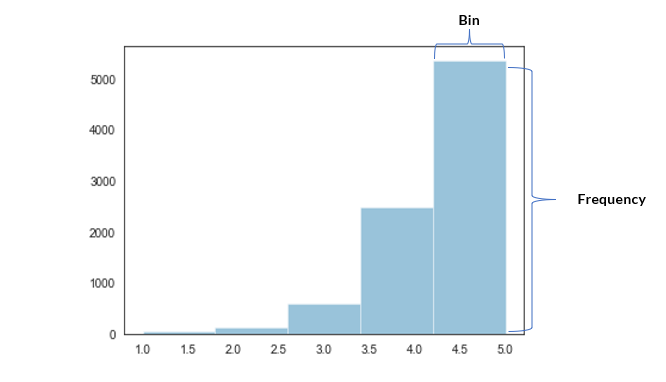

In [238]:
# example of histogram
from IPython.display import Image
Image(filename='Histogram.png')
# this histogram indicates that the higher values are more frequent
# with the most frequent value being the bin with the highest values

You can adjust the number of bins to improve its granularity

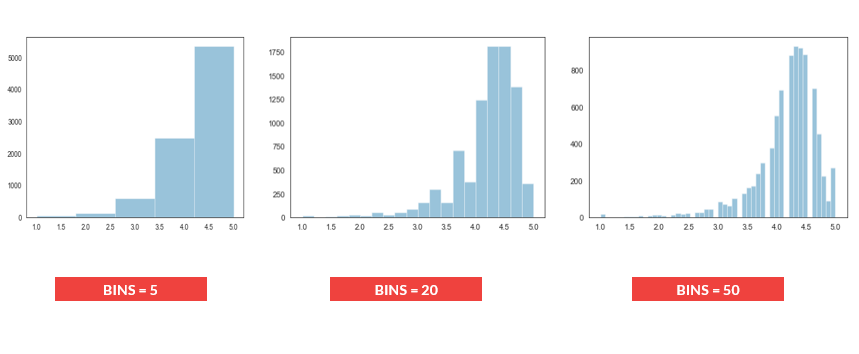

In [239]:
Image(filename='Granular.png')
# with the more bins, we can get a more accurate picture of the data

As you can observe, increasing the bins to 20 gives a more in-depth analysis than the one with only 5 bins. You can keep on increasing the number of bins as per your requirement and make sure that there are enough bins to predict the trends in the data correctly. For example, the final image with 50 bins is too granular and even has gaps in-between; this indicates that no records occur in such a fine-tuned bin range, and therefore it is of not much use to us.

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

**Reviews**
How are reviews distributed?

In [242]:
# see the options
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

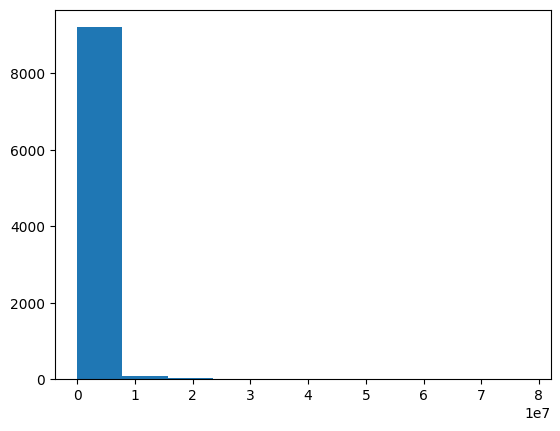

In [243]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

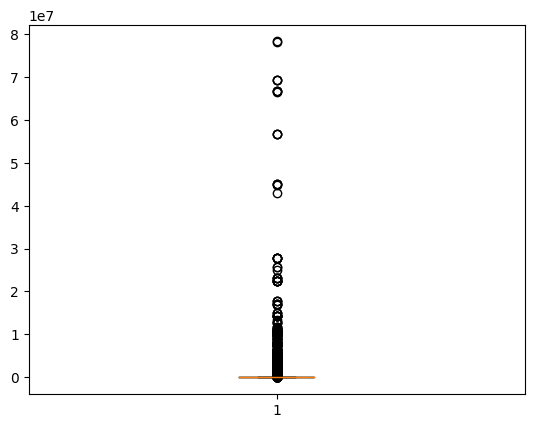

In [244]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [245]:
#Check records with 10 million reviews
inp1[inp1.Reviews > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


This reveals that lots of pre-installed and superstar apps are present in the data. These apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews), which is not common for a majority of the rest of the apps. Hence, you took a qualifier of 1 million reviews and removed all the apps having more reviews.

In [246]:
#Drop records with more than 1M reviews
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

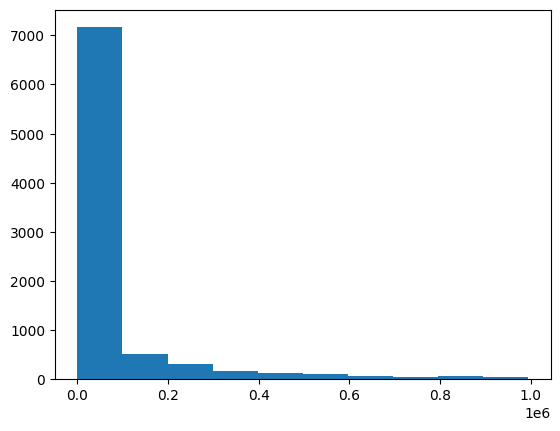

In [247]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()

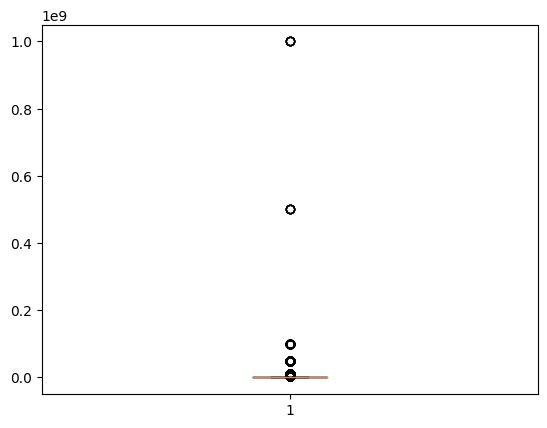

In [248]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()

Now, go ahead and analyse the Installs and the Size columns as well in the following questions

Note that you can check the video solutions for verifying your approach.

In [249]:
# report the IQR
inp1.Installs.describe()  # 1.000000e+06 - 1.000000e+04
# IQR = 990,000, or 9.9 * 10^5

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [251]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]

# Evaluate the shape of the data
inp1.shape

(8624, 13)

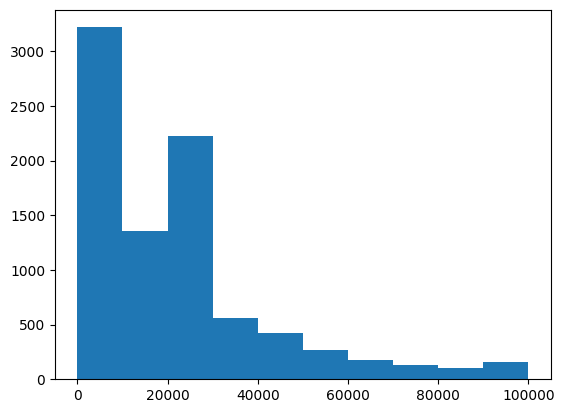

In [257]:
# Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()
#Once you create the histogram, it is clearly visible that the first three peaks
#outweigh the rest of the bars, and hence you can say that a majority of apps have a size less than 30,000.

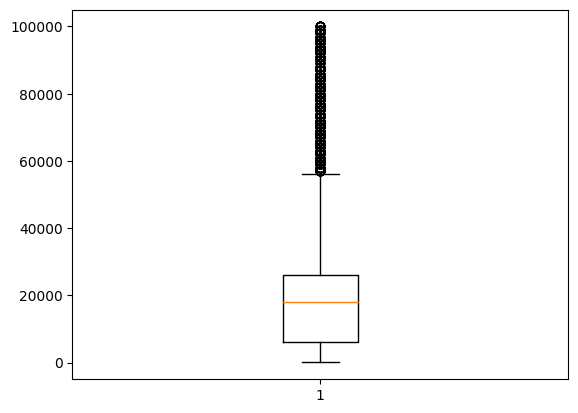

In [260]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [259]:
# report back the median value
inp1.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

Histograms vs Bar Plots

You have already studied bar plots in the previous module. Now it is a common misconception to confuse them with histograms. To understand the difference try analysing the following two situations and then choose the correct option:



Situation A - You want to visualise the total number of runs scored by MS Dhoni in a single year against all the teams he has played against.

Situation B - You want to visualise the spread of the runs scored by MS Dhoni in a single year.

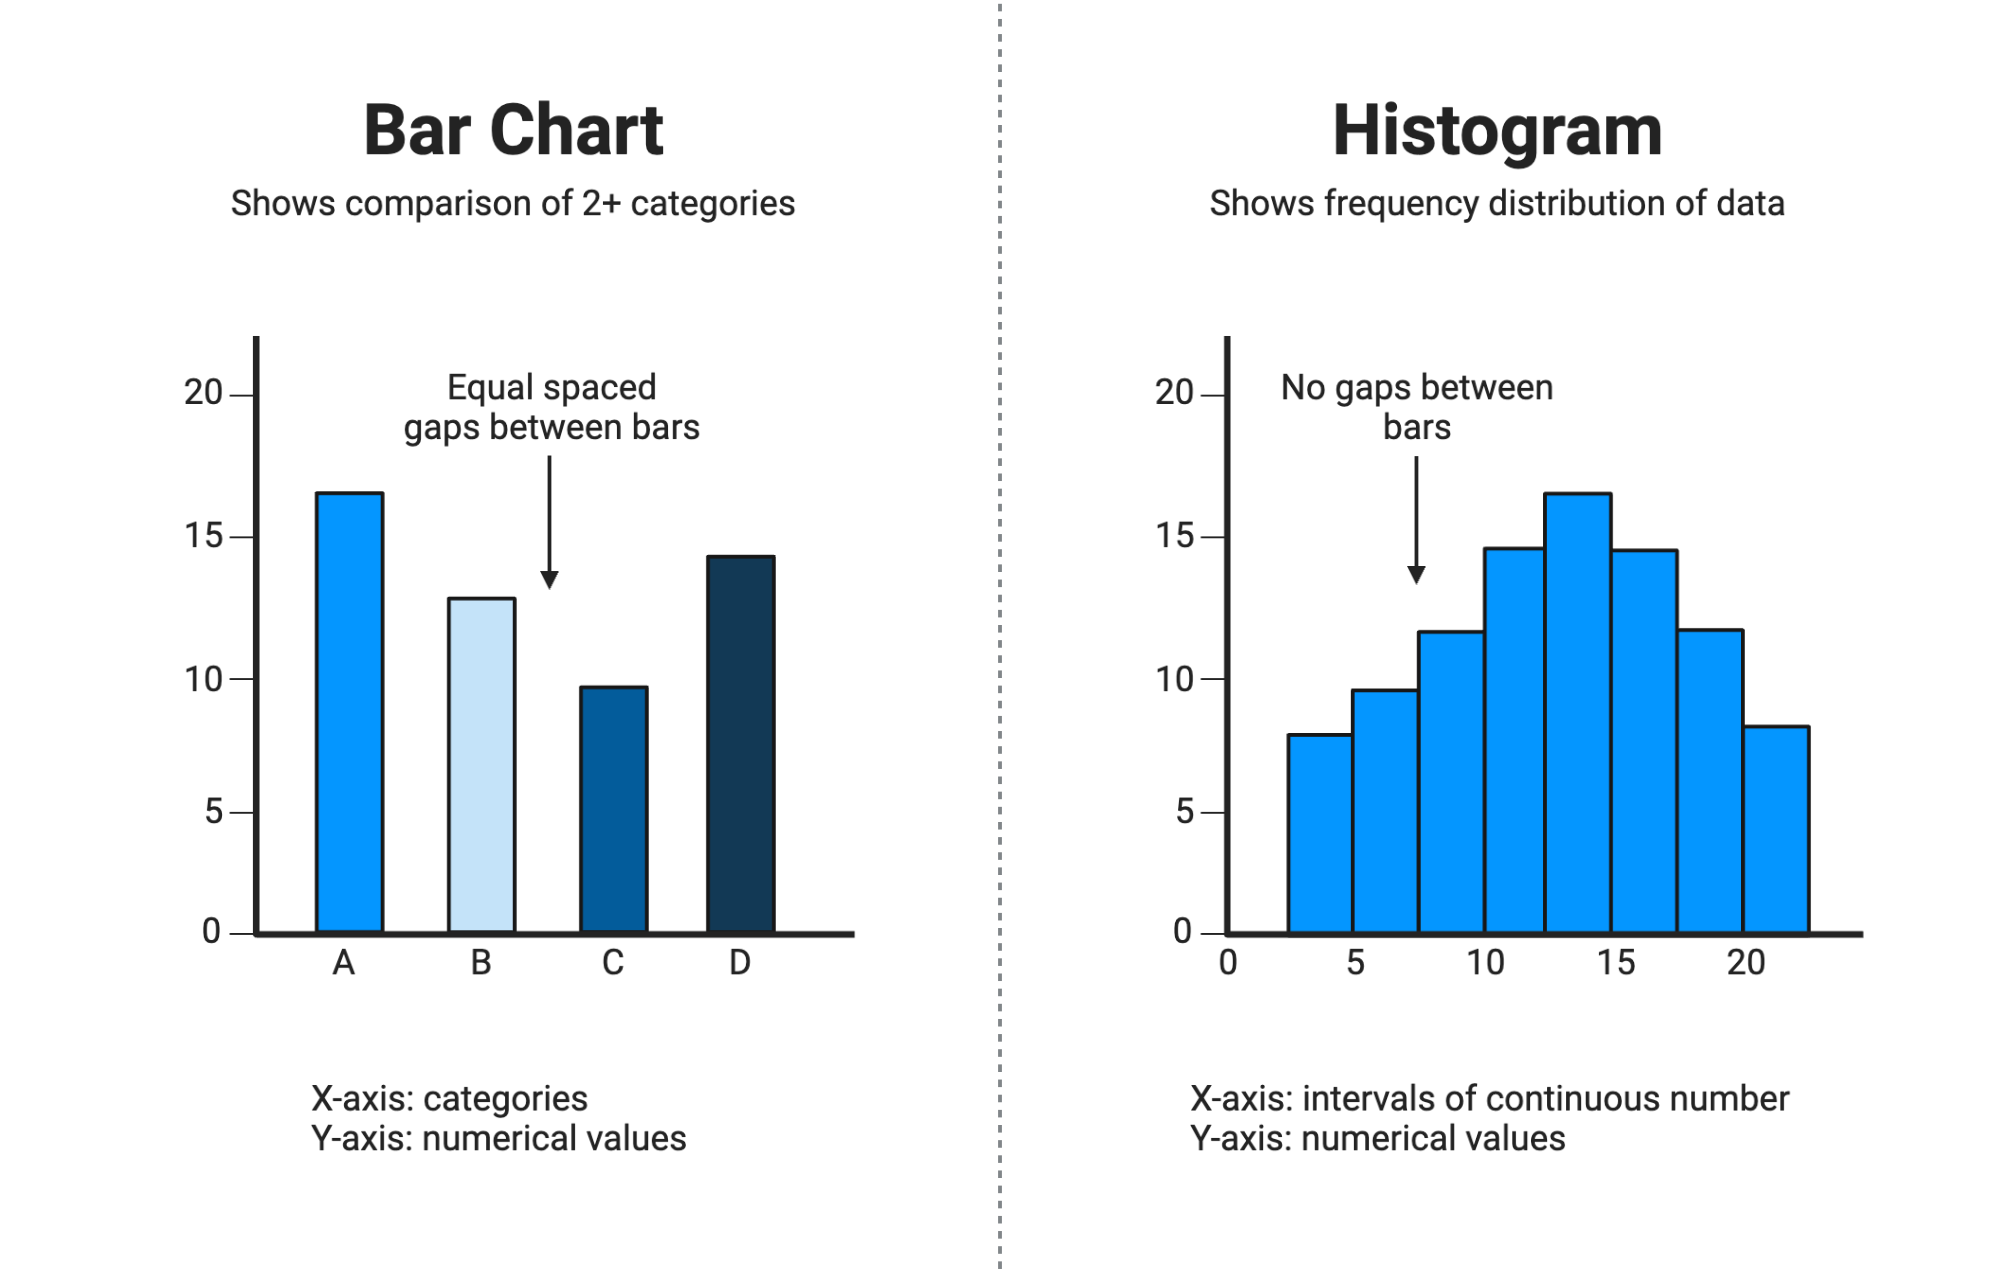

In [261]:
# display histogram_vs_barplots.png
Image(filename='histogram_vs_barplots.png')

Solution: Situation A requires a bar plot whereas Situation B requires a histogram.

Explanation:
A Histogram plots the frequency of a numeric variable, whereas the Bar plot shows the aggregation of a certain numerical entity for some categorical variable. In Situation A, you are analysing the total sum of runs, which is a numeric variable for all the teams, which is a categorical variable. Hence it will need a bar plot. For Situation B, you're understanding the spread of a numeric variable by checking the frequency. Hence a histogram will be used here.


Summary:
* Bar Plot: Shows comparison between different groups.
* Histogram: Shows the general pattern or spread of numerical data

3 Key Takeaways:
- before we calculate the mean, or draw any conclusions from a dataset, we first have to clean it, make sure data is legit, and representative. It may makes sense to remove extreme values if they represent extreme, rare outliers (e.g. superapps). We also have to do sanity checks, to ensure the data is correct (e.g. in a ratings column (1-5)), all values must fall between 1-5.
- IQR = Q3 - Q1
- .plot.box() is a quick way to get boxplot, e.g. inp1[inp1.Price>0].Price.plot.box()


# **Practice Questions**

In [24]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [41]:
df = pd.read_csv("virat.csv")
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5

In [42]:
# First, check out if the data in the 'Runs' column is numeric
df['Runs'].describe() # as we can see its object, not numeric

count     132
unique     83
top         0
freq       10
Name: Runs, dtype: object

In [16]:
# now lets print the rows with NaN values in df['Runs']
df[df['Runs'].isna()] # seesms like NaN values are not the issue

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Runs_numeric


In [19]:
# check NaN values for all columns with the count method
df['Runs'].value_counts()
# here we can see that the issue is star in the end, so we have to remove star in the end

Runs
0      10
2       5
12      4
37      4
1       4
       ..
77*     1
26      1
43      1
64      1
55      1
Name: count, Length: 83, dtype: int64

In [17]:
# Attempt to convert 'Runs' to numeric and identify non-convertible values
df['Runs_numeric'] = pd.to_numeric(df['Runs'], errors='coerce')

# Find rows where conversion failed (i.e., non-numeric values are now NaN)
non_numeric_rows = df[df['Runs_numeric'].isna()]

# Display these rows to understand what the non-numeric values are
print(non_numeric_rows)

     Runs Mins   BF  4s  6s      SR  Pos Dismissal  Inns      Opposition  \
5      2*    6    2   0   0     100    7   not out     1     v Sri Lanka   
12   102*  128   95  11   0  107.36    3   not out     2    v Bangladesh   
24    63*   83   70   6   2      90    3   not out     2   v New Zealand   
30    87*  126   92   7   2   94.56    3   not out     2  v South Africa   
32   100*  113   83   8   2  120.48    4   not out     1    v Bangladesh   
49   112*  134   98  16   0  114.28    4   not out     2       v England   
51    86*    -   99  11   0   86.86    4   not out     2       v England   
56    23*   15   11   3   0  209.09    6   not out     1   v West Indies   
66   128*  187  119  12   1  107.56    3   not out     2     v Sri Lanka   
73    77*  110   79   9   2   97.46    3   not out     2       v England   
81    68*  128   88   5   1   77.27    3   not out     2      v Zimbabwe   
83   100*   82   52   8   7   192.3    3   not out     2     v Australia   
85   115*  1

In [20]:
# lets remove the star in the end from all values in Runs. Leave values unchanged if no * is in the end
df['Runs'] = df['Runs'].str.replace('*', '')

# now lets convert all the values in runs from str to numeric, integer
df['Runs'] = pd.to_numeric(df['Runs'])

In [21]:
# check NaN values for all columns with the count method
df['Runs'].value_counts()
# here we can see that the issue is star in the end, so we have to remove star in the end

Runs
0      10
2       6
1       5
12      4
37      4
       ..
21      1
128     1
6       1
15      1
55      1
Name: count, Length: 75, dtype: int64

In [22]:
# Analyse the spread of Runs scored by Virat in all his matches
# Calculate the 25th and 50th percentiles
percentile_25 = df['Runs'].quantile(0.25)
percentile_50 = df['Runs'].quantile(0.50)

# Calculate the difference between the 50th and 25th percentiles
difference = percentile_50 - percentile_25

25th Percentile: 10.0
50th Percentile: 32.5
Difference between 50th and 25th percentiles: 22.5


In [23]:
# report the difference between the scores at the 50th percentile and the 25th percentile respectively.
# Print the results
print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("Difference between 50th and 25th percentiles:", difference)

25th Percentile: 10.0
50th Percentile: 32.5
Difference between 50th and 25th percentiles: 22.5


Quick solution:

In [43]:
# First, you need to observe that the Runs column in the dataset is of object type because of some scores having an asterisk (*) symbol along with them, indicating that Virat was not out in that match (Check the dictionary if you have any doubt).
df['Runs'].describe() # as we can see its object, not numeric

count     132
unique     83
top         0
freq       10
Name: Runs, dtype: object

In [44]:
# Remove the asterisk symbol using a condition and the apply() function and convert the data type.
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))

In [45]:
df['Runs'].value_counts()

Runs
0      10
2       6
1       5
12      4
37      4
       ..
21      1
128     1
6       1
15      1
55      1
Name: count, Length: 75, dtype: int64

Once the necessary data cleaning tasks are done, use a describe() function, with percentiles parameter set at 0.25, 0.5 and 1.

In [46]:
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [47]:
df['Runs'].describe(percentiles = [0.25,0.5,1])  # Specifying 1 (or 100%) in the describe() function is a way to explicitly ask for the maximum value to be displayed as part of the output.
# its not necessary to include 1

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

This gives the value at 25th percentile as 10.00 and at 50th percentile as 32.5. Hence, the difference comes out to be 32.5-10.00 = 22.5.

**Box Plots**

Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


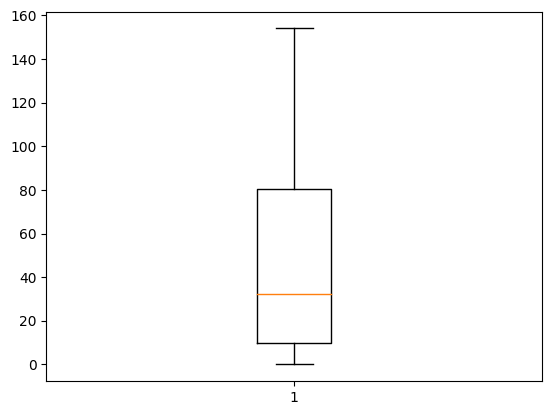

In [48]:
# Plot a Box Plot to analyse the spread of Runs that Virat has scored
plt.boxplot(df['Runs'])
plt.show()
# as we can see upper fence lies in interval 140-160

Question 3: False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III


[Hint: For solving this question, you first need to extract the year from the 'Start Date' column and store it in a separate column before proceeding to verify each of the statements mentioned above]

In [36]:
# extract the year from the 'Start Date' column and store it in a seperate Column called 'Year'
df['Year'] = pd.DatetimeIndex(df['Start Date']).year

In [38]:
# Count matches per year
matches_per_year = df['Year'].value_counts()

# Find the year with the maximum matches
max_matches_year = matches_per_year.idxmax()
print("Year with maximum matches:", max_matches_year)
print(matches_per_year)

Year with maximum matches: 2011
Year
2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: count, dtype: int64


In [39]:
# Convert runs to numeric, ensuring no non-numeric values interfere
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

# Group by year and calculate mean runs
average_runs_per_year = df.groupby('Year')['Runs'].mean()

# Find the year with the highest run average
max_average_year = average_runs_per_year.idxmax()
print("Year with highest run average:", max_average_year)
print(average_runs_per_year)


Year with highest run average: 2016
Year
2008    31.800000
2009    38.333333
2010    45.375000
2011    42.000000
2012    40.363636
2013    47.826087
2014    58.529412
2015    30.400000
2016    73.900000
2017    61.666667
Name: Runs, dtype: float64


In [40]:
# Find the maximum score overall
max_score = df['Runs'].max()
max_score_year = df[df['Runs'] == max_score]['Year'].iloc[0]

# Compare the year of the highest average and the year of the maximum score
print("Year with maximum score:", max_score_year)

Year with maximum score: 2016


Statement Analysis
1. Statement I: "Virat has played the maximum number of matches in 2011."

* Analysis: According to your output, Virat played the maximum number of matches in 2011 with 31 matches. This statement is true.

2. Statement II: "Virat has the highest run average in the year 2017."

* Analysis: The highest run average was in 2016 with an average of 73.9 runs. The run average for 2017 was 61.666667. This statement is false.

3. Statement III: "Virat has the maximum score in a single match and the highest run average in the year 2016."

* Analysis: The highest run average was indeed in 2016, and the maximum score was also in 2016. This statement is true.

Conclusion
* Option c) II is the correct answer, as it correctly identifies Statement II as the false statement.

**Solution**

In [49]:
# First, you have to do some formatting to the ‘Start Date’ column to get the year in which the match was played.
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))

In [50]:
# After that, do a value_counts() to find the number of matches played in each year.
df['Start Date'].value_counts()

Start Date
11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: count, dtype: int64

In [51]:
# Next, create a pivot table with the ‘Start Date’ entities as the columns, values set to ‘Runs’, and aggfunc() set to np.mean and np.max.
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


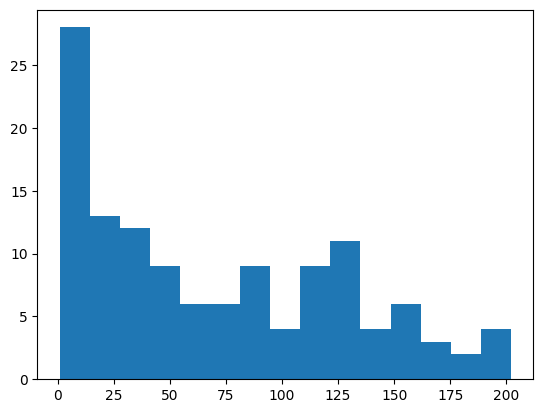

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Mins' to numeric, coercing errors to NaN
df['Mins'] = pd.to_numeric(df['Mins'], errors='coerce')

# Drop any rows where 'Mins' is NaN if you want to exclude them from the histogram
df = df.dropna(subset=['Mins'])

# Now plot the histogram
data = df['Mins']
counts, bin_edges = np.histogram(data, bins=15)
plt.hist(data, bins=15)
plt.show()

In [59]:
print(df['Mins'].describe())

count    126.000000
mean      70.492063
std       57.270131
min        1.000000
25%       18.250000
50%       56.000000
75%      120.750000
max      202.000000
Name: Mins, dtype: float64


In [60]:
# Define the ranges to check
ranges = {
    "A": (54.6, 68),
    "B": (68, 81.4),
    "C": (121.6, 135)
}

# Function to find the bin index for a given value
def find_bin(value, edges):
    for i in range(len(edges) - 1):
        if edges[i] <= value < edges[i+1]:
            return i
    return -1  # In case the value is out of the range of the bins

# Store frequencies for the specified ranges
range_frequencies = {}
for key, (lower, upper) in ranges.items():
    # Find bin indices that overlap with the range
    lower_idx = find_bin(lower, bin_edges)
    upper_idx = find_bin(upper, bin_edges)
    # Calculate the sum of counts in these bins
    range_frequencies[key] = sum(counts[lower_idx:upper_idx+1])

# Output the frequencies for comparison
print(range_frequencies)

# Find the range with the maximum frequency
max_freq_range = max(range_frequencies, key=range_frequencies.get)
print("Range with the highest frequency:", max_freq_range)

{'A': 12, 'B': 15, 'C': 24}
Range with the highest frequency: C


In [ ]:
# Solution provided

In [61]:
# Observe that the Mins column is also of an object type. This is due to the fact the some of the records are erroneous and have a ‘-’ value instead of a number. Therefore, we need to drop these records and convert the entire column to an int type column. Again, this can be done by using the qualifier [~(df['Mins']== "-")]. The code is as follows:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

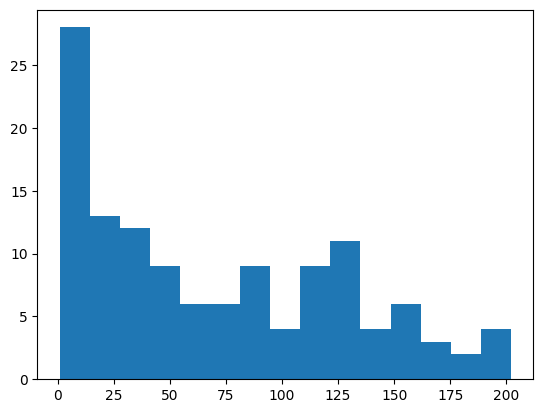

In [62]:
# Then, just create a histogram in matplotlib with bins=15.
plt.hist(df2.Mins, bins = 15)
#  Once that is done, you can observe that [121.6, 135) has the maximum frequency.